## Charging required librarys

In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

## Importing datasets, first look and concat

In [2]:
# Changing directory and importing databases
os.chdir('C:\\Users\\Wellington\\Jupyter notebook\\Python\\data bases')

train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')

In [3]:
# Seeing train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Seeing test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Seeing shape of each dataset
print('train shape:',train.shape)
print('teset shape:',test.shape)

train shape: (891, 12)
teset shape: (418, 11)


In [6]:
# Saving survived column from train dataset to be used latter
survived = train['Survived']
train = train.drop('Survived',axis=1)

In [7]:
# Concatenating train and test into titanic
titanic = pd.concat([train,test],axis=0,sort=False)

In [8]:
# Seeing result
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

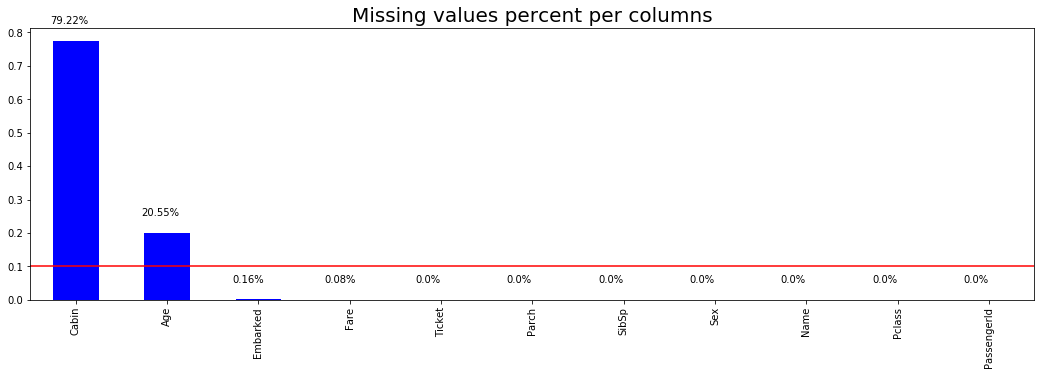

In [9]:
# Ploting missing values percentage in each dataset
plt.subplots(0,0, figsize = (18,5))
ax = (titanic.isnull().sum()/len(titanic)).sort_values(ascending = False).plot.bar(color = 'blue')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values percent per columns', fontsize = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.05, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

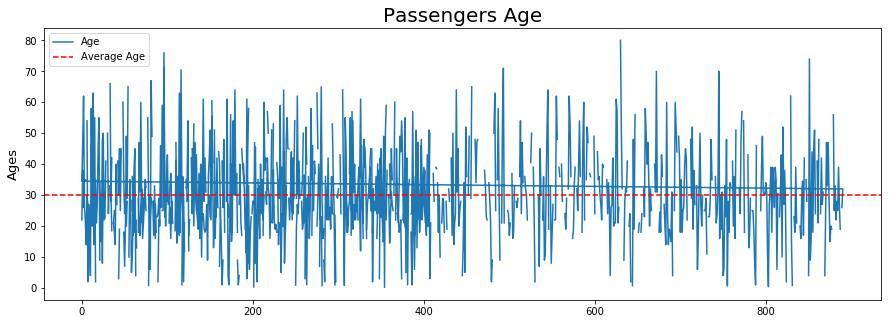

In [10]:
# Seeing passenger age distribution
plt.subplots(0,0, figsize = (15,5))
plt.plot(titanic['Age'])
plt.axhline(y=np.mean(titanic['Age']), color='r', linestyle='--') # Ploting a line with average age
plt.title('Passengers Age',fontsize=20) # Ploting the title
plt.ylabel("Ages",fontsize=13)
plt.legend(('Age','Average Age'))

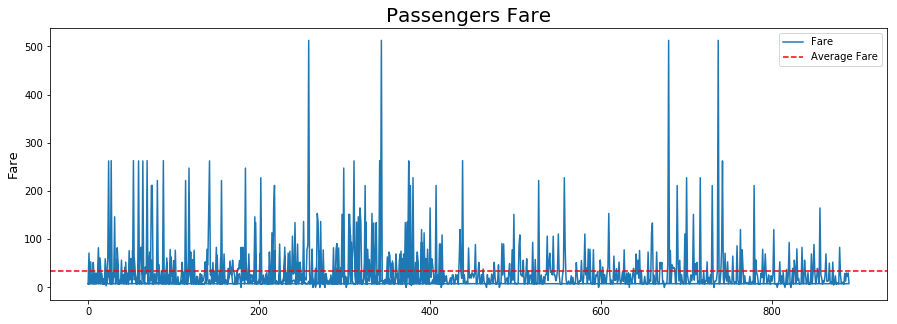

In [11]:
# Seeing passenger Fare distribution
plt.subplots(0,0, figsize = (15,5))
plt.plot(titanic['Fare'])
plt.axhline(y=np.mean(titanic['Fare']), color='r', linestyle='--')# Ploting a line with average fare
plt.title('Passengers Fare',fontsize=20) # Ploting the title
plt.ylabel("Fare",fontsize=13)
plt.legend(('Fare','Average Fare'))

In [12]:
# Seeing a summary of numeric columns
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
# Taking a looking into Ticket colum
titanic['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

We have 929 unique values in Ticket, let's just droop this column latter

## Dealing with missing values and treating variables

In [14]:
# let's replace na's of Age and Fare using a linear regression to predict missing age and fare
# let's replace na's from Embarked variables by 'U' to indicate an unknown value

# replacing na's of Age using linear regression method
titanic['Age'] = titanic['Age'].interpolate(method="linear",
                                         limit_direction="forward")

# replacing na's of Age using linear regression method
titanic['Fare'] = titanic['Fare'].interpolate(method="linear",
                                         limit_direction="forward")

# replacing na's of Embarked from U
titanic['Embarked'] = titanic['Embarked'].fillna('U')
titanic['Embarked'] = titanic['Embarked'].astype('category') # Converting into categorys

In [15]:
# Converting Ages into groups
data = [titanic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11,'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age']<=18),'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age']<=22),'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age']<=27),'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age']<=33),'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age']<=40),'Age'] = 5
    dataset.loc[(dataset['Age'] >40) & (dataset['Age']<=66),'Age'] = 6
    dataset.loc[dataset['Age']>66,'Age'] = 6

In [16]:
# Converting Fares into groups
data = [titanic]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[dataset['Fare'] <=50,'Fare'] =0
    dataset.loc[(dataset['Fare'] >50) & (dataset['Fare']<=100),'Fare'] = 1
    dataset.loc[(dataset['Fare'] >100) & (dataset['Fare']<=200),'Fare'] = 2
    dataset.loc[(dataset['Fare'] >200) & (dataset['Fare']<=300),'Fare'] = 3
    dataset.loc[(dataset['Fare'] >300) & (dataset['Fare']<=400),'Fare'] = 4
    dataset.loc[(dataset['Fare'] >400) & (dataset['Fare']<=500),'Fare'] = 5
    dataset.loc[dataset['Fare']>500,'Fare'] = 5

In [17]:
# Verifying Na's
titanic.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

Let's deal with Cabin column latter

In [18]:
# Converting sex into numeric
gender = {'male':0,'female':1}
data = [titanic]

for dataset in data:
    dataset['Sex'] =dataset['Sex'].map(gender)

In [19]:
# we have 681 unique values in Ticket variable, let's drop Ticket column from our datasets
titanic = titanic.drop('Ticket',axis=1)

## Creating new features

In [20]:
# creating a new feature using Name column
data = [titanic]

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False) # extracting titles from Name column
    
    #Replace title with more common one
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr', 
                                                'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].fillna(0) # fill na's
    dataset['Title']  = dataset['Title'].astype('category') # converting into categorys

In [21]:
# Dropping Name column from datasets
titanic = titanic.drop('Name',axis=1)

In [22]:
# Verifying result
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,0,2,1,0,0,NaN,S,Mr
1,2,1,1,5,1,0,1,C85,C,Mrs
2,3,3,1,3,0,0,0,NaN,S,Miss
3,4,1,1,5,1,0,1,C123,S,Mrs
4,5,3,0,5,0,0,0,NaN,S,Mr


In [23]:
# Creating a new feature called "Deck" using "Cabin"
data = [titanic]

for dataset in data: # loop to create the new feature
    dataset['Cabin'] = dataset['Cabin'].fillna('H0') # replacing NA's
    dataset['Deck']  = dataset['Cabin'].map(lambda x: re.compile('([a-z,A-Z]+)').search(x).group())
    dataset['Deck']  = dataset['Deck'].fillna(0) # replacing NA's
    dataset['Deck']  = dataset['Deck'].astype('category') # converting Deck feature into categorys

In [24]:
# Dropping Cabin column
titanic = titanic.drop(['Cabin'],axis = 1)

In [25]:
# Verifying result
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,1,3,0,2,1,0,0,S,Mr,H
1,2,1,1,5,1,0,1,C,Mrs,C
2,3,3,1,3,0,0,0,S,Miss,H
3,4,1,1,5,1,0,1,S,Mrs,C
4,5,3,0,5,0,0,0,S,Mr,H


In [26]:
# creating a variables for passengers that have a family aboard
titanic['family_aboard'] = np.where((titanic['Parch']>=1) & (titanic['SibSp']>=1),1,0)

# creating a variable for passengers that are single dad's
titanic['single_dad'] = np.where((titanic['Parch']>=1) & (titanic['SibSp']==0) & (titanic['Sex']==0),1,0)

# creating a variable for passengers that are single mom's
titanic['single_mom'] = np.where((titanic['Parch']>=1) & (titanic['SibSp']==0) & (titanic['Sex']==1),1,0)

# creating a variables to discribe the family size
titanic['family_small'] = np.where((titanic['Parch']<2) & (titanic['SibSp']<2),1,0)
titanic['family_median'] = np.where((titanic['Parch']==3) & (titanic['SibSp']>2),1,0)
titanic['family_large'] = np.where((titanic['Parch']>3) & (titanic['SibSp']>3),1,0)

In [27]:
# drooping the columns that was used to creat new features
titanic = titanic.drop(['Parch','SibSp'],axis=1)

In [28]:
# Verifying result
titanic.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Deck,family_aboard,single_dad,single_mom,family_small,family_median,family_large
0,1,3,0,2,0,S,Mr,H,0,0,0,1,0,0
1,2,1,1,5,1,C,Mrs,C,0,0,0,1,0,0
2,3,3,1,3,0,S,Miss,H,0,0,0,1,0,0
3,4,1,1,5,1,S,Mrs,C,0,0,0,1,0,0
4,5,3,0,5,0,S,Mr,H,0,0,0,1,0,0


## Dealing With Categorical Features and Spliting Titanic dataset

In [29]:
# converting our categorical variables into new binary variables
df_emb = pd.get_dummies(titanic['Embarked'])
df_Tit = pd.get_dummies(titanic['Title'])
df_Dec = pd.get_dummies(titanic['Deck'])

# Concat new columns with binary values into train dataset
titanic = pd.concat([titanic, df_emb, df_Tit, df_Dec], axis=1)

In [30]:
# drooping the columns with categorys
titanic = titanic.drop(['Embarked','Title','Deck'],axis=1)

In [31]:
# Verifying result
titanic.head()

,PassengerId,Pclass,Sex,Age,Fare,family_aboard,single_dad,single_mom,family_small,family_median,...,Rare,A,B,C,D,E,F,G,H,T
0,1,3,0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,5,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,5,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,0,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
# Spliting titanic dataset into train and test again
train = titanic[0:891]
test = titanic[891:1310]

In [33]:
# Seeing shape
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (891, 29)
test shape: (418, 29)


In [34]:
# Saving PassengerId of test dataset to create submission dataset
passengerId = test['PassengerId']

In [35]:
# Drooping PassengerId column from train and test
train = train.drop('PassengerId',axis=1)
test = test.drop('PassengerId',axis=1)

In [36]:
# Seeing train dataset first5 rows
train.head()

,Pclass,Sex,Age,Fare,family_aboard,single_dad,single_mom,family_small,family_median,family_large,...,Rare,A,B,C,D,E,F,G,H,T
0,3,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,5,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,5,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# Seeing test dataset first5 rows
test.head()

,Pclass,Sex,Age,Fare,family_aboard,single_dad,single_mom,family_small,family_median,family_large,...,Rare,A,B,C,D,E,F,G,H,T
0,3,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Creating Models and Make Predictions

In [38]:
# Separing datasets to training and prediction
x_train = train
y_train = survived
x_test = test

###### Decision Tree Pruned by 5 max_depth to trying to avoid overfitting

In [39]:
# Creating a Decision Tree Classifier model
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 5)

# Training the model
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# Applying our model in train dataset
y_pred_train = tree.predict(x_train)

In [41]:
# Seeing results
print(confusion_matrix(y_train, y_pred_train))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train))

[[528  21]
 [116 226]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       549
           1       0.91      0.66      0.77       342

   micro avg       0.85      0.85      0.85       891
   macro avg       0.87      0.81      0.83       891
weighted avg       0.86      0.85      0.84       891



In [42]:
print("Accuracy:", round(metrics.accuracy_score(y_train, y_pred_train),3)*100)

Accuracy: 84.6


In [43]:
# Applying our model in test dataset
y_pred_test = tree.predict(x_test)

In [44]:
# Creating the dataset to submission
submission = pd.DataFrame({"PassengerId":passengerId,"Survived":y_pred_test})
submission.to_csv('DecisionTree.csv',index = False)

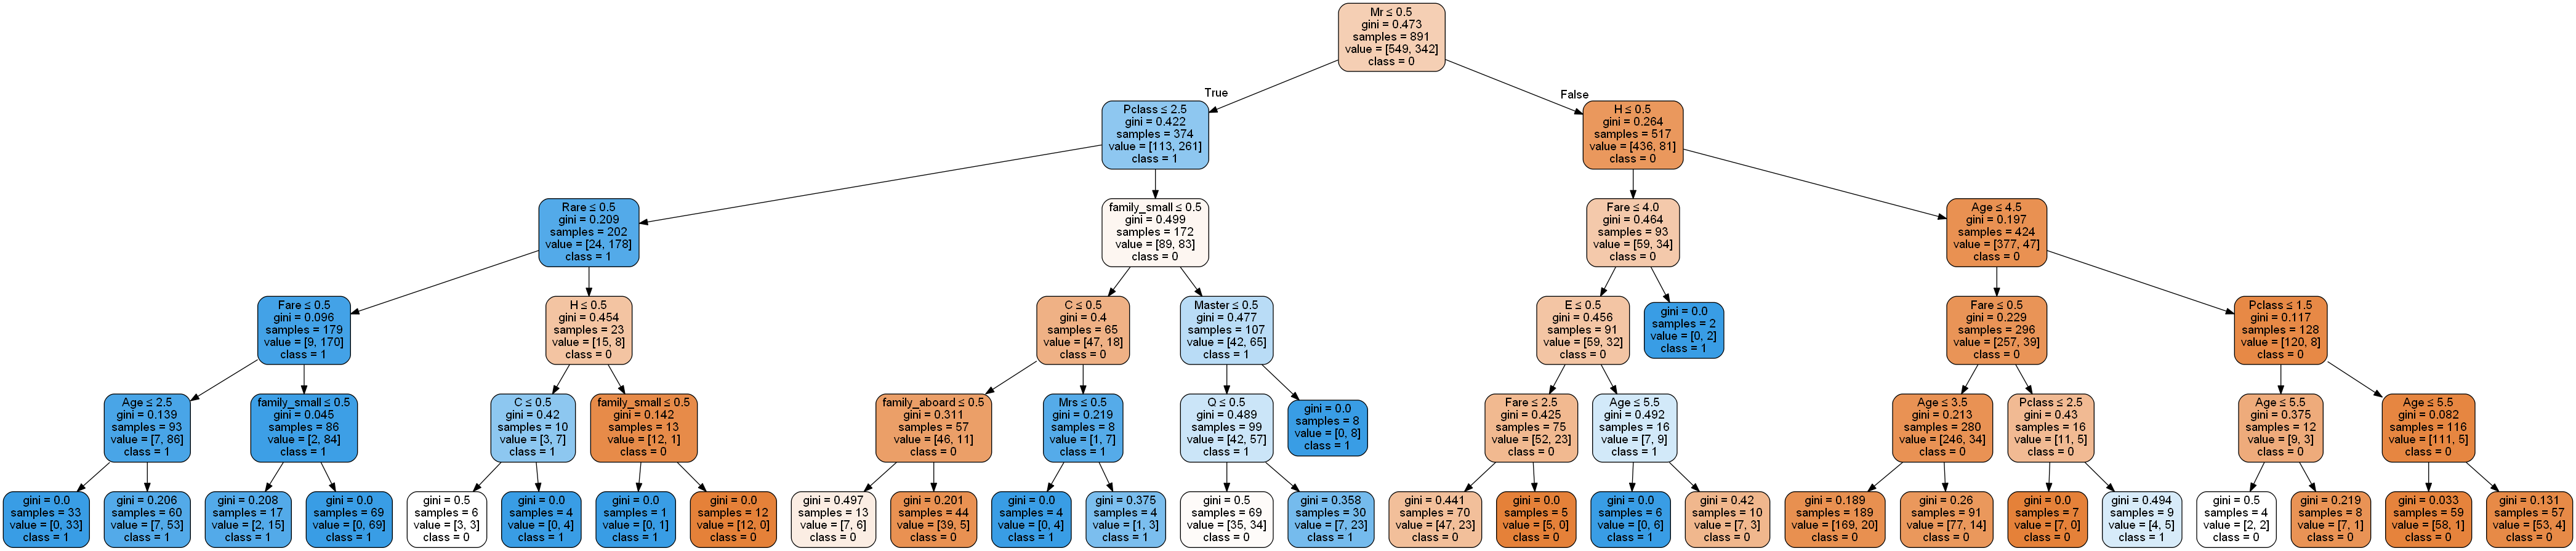

In [45]:
# Plooting our tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO() #open the input and output from jupyter
# to external program

#creating the plot
export_graphviz(tree,
               out_file = dot_data,
               filled = True,
               rounded = True,
               special_characters = True,
               feature_names = x_train.columns[0:30],
               class_names = ['0','1'])

#pushing the plot from external program to jupyter
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#ploting the tree
Image(graph.create_png())

###### Let's now submiss our prediction in test dataset to kaggle competition

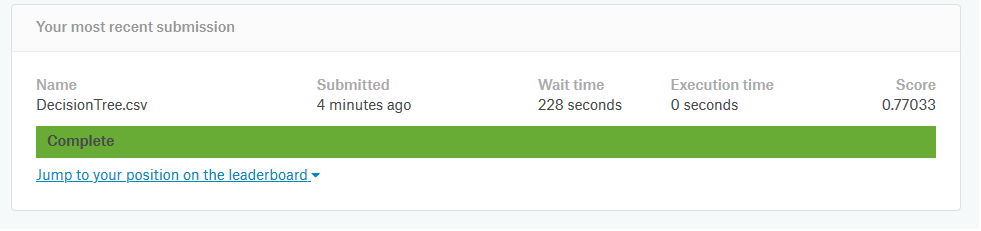

In [46]:
# Seeing results in test dataset submited in kaggle/ importing image of results from our directory
Image(filename='decision tree 1.PNG')

###### The result was not soo good, 84,6% in train but only 77,03 % in test, our model are not capable of generalize let's try to improve this results pruning our tree again

In [47]:
# Creating a Decision Tree Classifier model pruning by 3 max_depth
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

# Training the model
tree.fit(x_train,y_train)

# Applying our model in train dataset
y_pred_train = tree.predict(x_train)

# Seeing results
print(confusion_matrix(y_train, y_pred_train))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train))

[[498  51]
 [105 237]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       549
           1       0.82      0.69      0.75       342

   micro avg       0.82      0.82      0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [48]:
print("Accuracy:", round(metrics.accuracy_score(y_train, y_pred_train),3)*100)

Accuracy: 82.5


In [49]:
# Applying our model in test dataset
y_pred_test = tree.predict(x_test)

# Creating the dataset to submission
submission = pd.DataFrame({"PassengerId":passengerId,"Survived":y_pred_test})
submission.to_csv('DecisionTree2.csv',index = False)

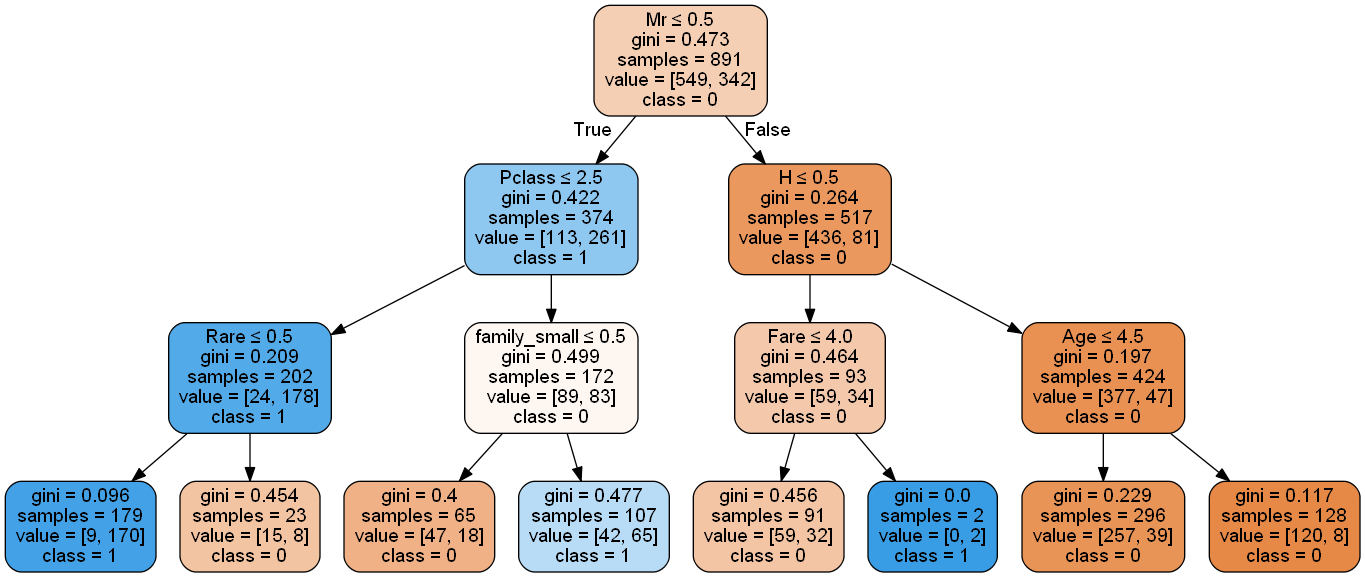

In [50]:
# Plooting our tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO() #open the input and output from jupyter
# to external program

#creating the plot
export_graphviz(tree,
               out_file = dot_data,
               filled = True,
               rounded = True,
               special_characters = True,
               feature_names = x_train.columns[0:30],
               class_names = ['0','1'])

#pushing the plot from external program to jupyter
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#ploting the tree
Image(graph.create_png())

###### Let's submiss our prediction again

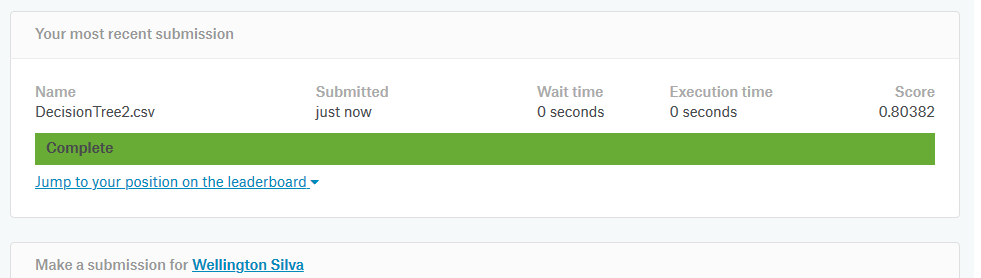

In [51]:
# Seeing results in test dataset submited in kaggle/ importing image of results from our directory
Image(filename='decision tree 2.PNG')

###### 80% of accuracy, a great result!, 82,5% in train and 80,38% in test dataset, the model now are capable of generalize